## Lesson 4:
### Exercise 1: Upsampling a dataset

#### We want to upscale a sample from the SDSS data:
1. We import the whole SDSS dataset
2. We consider the first 10000 data points

In [67]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy import stats, interpolate
from astroML.datasets import fetch_dr7_quasar
from tqdm.notebook import tqdm

data = fetch_dr7_quasar()
# select the first 10000 points
data = data[:10000]

z = data['redshift']

### 1. Rejection sampling method

1. We plot the normalized histogram of our redshift data
2. We generate a uniform distribution that upper bounds the histogram and draw a sample of points from it
3. Check if the points are under the area of the histogram, in which case we keep them. Otherwise we reject them.
4. The x-values of the points we kept will be distributed according to the original pdf.

  0%|          | 0/49 [00:00<?, ?it/s]

Text(0, 0.5, 'Counts')

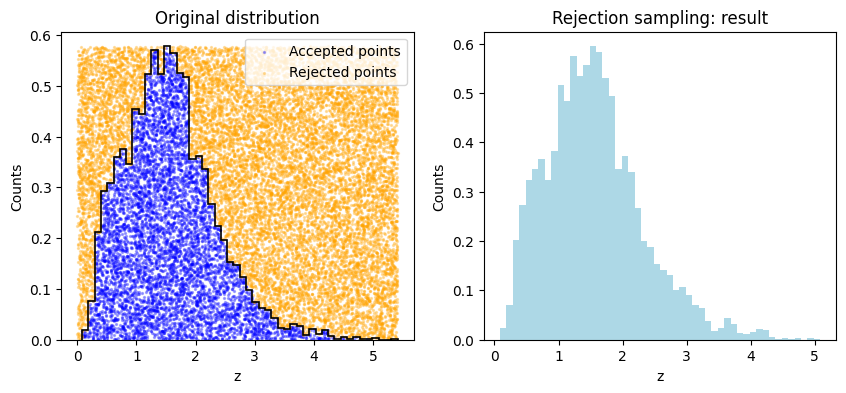

In [69]:
np.random.seed(1)
N = 20000
bins = 50

fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.subplot(121)
plt.hist(z, bins=bins, histtype='step', color='k', density = True, linewidth = 1.2);

hist, bin_edges = np.histogram(z, bins=bins, density=True)
z_max = np.max(hist) #This way we get the maximum of the normalized histogram
z_uniform = np.random.uniform(0, z_max, N)
x_uniform = np.random.uniform(0, np.max(z), N)

#List of couples [a, b]: "a" is the x, "b" is the z for "a" within a certain bin of the histogram

#Now we apply the rejection sampling method:
good_x = []
good_z = []
for i in tqdm(range(0, bins-1)):
    couple_in_bin = [[a,b] for a, b in zip(x_uniform, z_uniform) if a > bin_edges[i] and a < bin_edges[i+1]]
    for j in couple_in_bin: 
        if j[1] < hist[i]:
            good_x.append(j[0])
            good_z.append(j[1])

# We plot the results
plt.scatter(good_x, good_z, c = 'blue', s = 2, label = 'Accepted points', alpha=0.3);
rej_x = [x for x in x_uniform if x not in good_x]
rej_z = [z for z in z_uniform if z not in good_z]
plt.xlabel("z")
plt.ylabel("Counts")
plt.scatter(rej_x, rej_z, s=2, c = 'orange', label = 'Rejected points', alpha=0.3);
plt.title("Original distribution")
plt.legend()

plt.subplot(122)
plt.hist(good_x, bins=bins, histtype='bar', density = True, color='lightblue');
plt.title("Rejection sampling: result")
plt.xlabel("z")
plt.ylabel("Counts")

### 2. Inverse transform sampling method

1. Plot the cumulative distribution function simply by adding **"cumulative=True"** as an attribute of plt.hist() function
2. Find the height of each bin in the histogram
3. Draw a sample from a uniform distribution between 0 and 1
4. Use the inverse cumulative function to compute the "quantile" associated to each number
5. Those quantiles will be distributed as the original pdf

[1.09352696 1.84018892 0.66686299 ... 2.58685088 2.58685088 1.84018892]


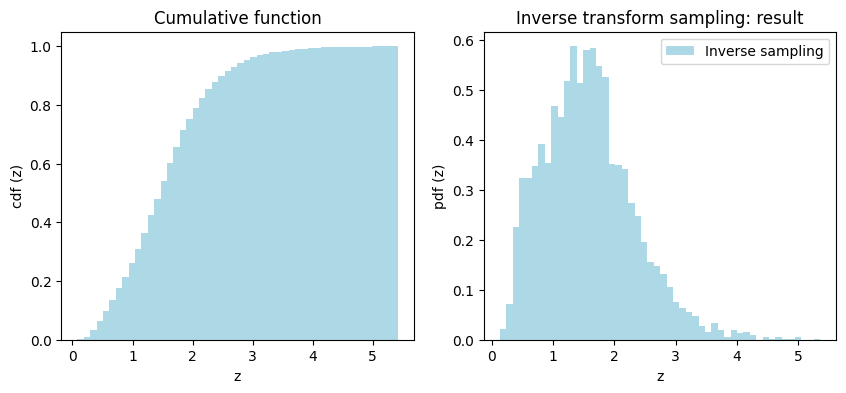

In [71]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.subplot(121)
plt.hist(z, bins=bins, histtype='bar', density = True, cumulative = True, label = 'Cumulative density function', color='lightblue');
plt.title("Cumulative function")
plt.xlabel("z")
plt.ylabel("cdf (z)")

hist, bin_edges = np.histogram(z, bins=bins, density=True)
norm_cdf = np.cumsum(hist)/np.amax(np.cumsum(hist))

uniform_u = np.random.uniform(0, 1, N)
ind_val = [] #Array of indices of x elements associated with u

for u in uniform_u:
    ind_val.append(np.argmax(norm_cdf > u)) # np.argmax() returns the index of the first value for which "norm_cdf > u":
                                            # the quantile associated to "u"
upper = [bin_edges[i+1] for i in ind_val]
lower = [bin_edges[i] for i in ind_val]
x_sample = [b + 0.5*(a - b) for (a, b) in zip(upper, lower)] # We compute the center value of the bin in which the "quantile" is.
print(np.array(x_sample))

plt.subplot(122)
plt.hist(x_sample, bins=bins, histtype='bar', color='lightblue', density=True, label='Inverse sampling');
plt.title('Inverse transform sampling: result')
plt.xlabel('z')
plt.ylabel('pdf (z)')
plt.legend()
